<a href="https://colab.research.google.com/github/ankan92/Artificial-Neural-Network-ANN-/blob/main/Banking_loan_prediction_using%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem
We have a Bank data set. From that data set we have to predct if the customer will take a personal Loan or Not.

Using ANN Metod we predict this classification model

## Importing Bsic Library

In [101]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier # MLPClassifier stands for Multi Layer Perceptron classifier


MLP Classifier generally used for machine learning problem but deep learning problem. We used other packeges called Keras or tensorflow. Which support the same neural network. Algorithm for larger data set and more complex problem

In [102]:
bank = pd.read_csv("Bank_Dataset.csv")

## Check first five values of the data set

In [103]:
bank.head()

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Check all the features names in date set

In [104]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family_members',
       'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

## Drop unused columns

In [105]:
bank.drop(['ID','ZIP_Code'], axis = 1, inplace = True)

## After dropping the columns check the reaming columns

In [106]:
bank.columns

Index(['Age', 'Experience', 'Income', 'Family_members', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

## Spli the data set on Dependent and independent variable

In [107]:
X = bank.drop(['Personal_Loan'], axis = 1)
y = bank['Personal_Loan']

## Now split the data set Training and Testing

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .30, random_state= 27)

In [110]:
# After splitting Check the Shape of the train and test set
print("Shape of the X_train data set",X_train.shape)
print("Shape of the X_test data set", X_test.shape)
print("Shape of the y_train data set", y_train.shape)
print("Shape of the y_test data set", y_test.shape)

Shape of the X_train data set (3487, 11)
Shape of the X_test data set (1495, 11)
Shape of the y_train data set (3487,)
Shape of the y_test data set (1495,)


## Scale the data set

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
sc = StandardScaler()

In [113]:
X_train = sc.fit_transform(X_train)


In [114]:
X_train

array([[ 0.22702424,  0.15893175,  1.41450874, ...,  3.92057292,
         0.83032402,  1.55627193],
       [-0.99936387, -0.89167492,  0.78275964, ..., -0.25506476,
         0.83032402, -0.64256122],
       [-0.64896727, -0.54147269, -0.76393643, ..., -0.25506476,
         0.83032402, -0.64256122],
       ...,
       [-0.38616981, -0.27882103, -0.06683397, ..., -0.25506476,
         0.83032402,  1.55627193],
       [-0.29857066, -0.19127047, -1.13427211, ..., -0.25506476,
         0.83032402, -0.64256122],
       [ 1.7162098 ,  1.73484175,  0.95703526, ...,  3.92057292,
         0.83032402,  1.55627193]])

In [115]:
X_test = sc.transform(X_test)
# Note: We should not perform fit_transform on the test data set we only tranform the transform. Because we have already
# fited the training data and using mean and sd of the training information
# we have to create or standrdized the test data

In [116]:
X_test

array([[-1.34976047e+00, -1.41697825e+00,  1.29226092e-01, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       [ 1.45341235e+00,  1.47219008e+00, -1.39568553e+00, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01],
       [-1.52495877e+00, -1.50452880e+00, -1.48061803e-03, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       ...,
       [-2.10971513e-01, -1.91270471e-01, -7.85720880e-01, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01],
       [-2.98570664e-01, -1.91270471e-01,  1.54521545e+00, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       [ 1.45341235e+00,  1.38463953e+00, -3.06462942e-01, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01]])

## Building the model

In [117]:
clf = MLPClassifier(hidden_layer_sizes = 100, max_iter = 5000,
                    solver = 'sgd', verbose = True, random_state=21,
                    tol= 0.001)

In [118]:
clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

Iteration 1, loss = 0.64337742
Iteration 2, loss = 0.57200145
Iteration 3, loss = 0.50925782
Iteration 4, loss = 0.46310156
Iteration 5, loss = 0.42893914
Iteration 6, loss = 0.40240410
Iteration 7, loss = 0.38109913
Iteration 8, loss = 0.36349894
Iteration 9, loss = 0.34854138
Iteration 10, loss = 0.33552069
Iteration 11, loss = 0.32394017
Iteration 12, loss = 0.31366579
Iteration 13, loss = 0.30439043
Iteration 14, loss = 0.29594532
Iteration 15, loss = 0.28805189
Iteration 16, loss = 0.28083580
Iteration 17, loss = 0.27416434
Iteration 18, loss = 0.26794322
Iteration 19, loss = 0.26211477
Iteration 20, loss = 0.25668754
Iteration 21, loss = 0.25157118
Iteration 22, loss = 0.24682533
Iteration 23, loss = 0.24234252
Iteration 24, loss = 0.23816454
Iteration 25, loss = 0.23413897
Iteration 26, loss = 0.23031545
Iteration 27, loss = 0.22676508
Iteration 28, loss = 0.22330409
Iteration 29, loss = 0.22005055
Iteration 30, loss = 0.21691629
Iteration 31, loss = 0.21398075
Iteration 32, los

## Create Performance matrix

In [119]:
from sklearn.metrics import confusion_matrix,classification_report

In [120]:
confusion_matrix(y_train, y_pred_train)

array([[3140,   10],
       [ 168,  169]])

In [121]:
confusion_matrix(y_test, y_pred_test)

array([[1349,    5],
       [  66,   75]])

In [122]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3150
           1       0.94      0.50      0.66       337

    accuracy                           0.95      3487
   macro avg       0.95      0.75      0.81      3487
weighted avg       0.95      0.95      0.94      3487



In [123]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1354
           1       0.94      0.53      0.68       141

    accuracy                           0.95      1495
   macro avg       0.95      0.76      0.83      1495
weighted avg       0.95      0.95      0.95      1495



## Build ROC Curve

[[0.86250583 0.13749417]
 [0.95872585 0.04127415]
 [0.98941072 0.01058928]
 ...
 [0.97843662 0.02156338]
 [0.99187231 0.00812769]
 [0.74367464 0.25632536]]
[0.13749417 0.04127415 0.01058928 ... 0.02156338 0.00812769 0.25632536]
AUC: 0.975


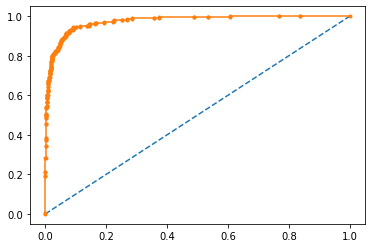

In [131]:
# AUC and ROC for the training data

# Predict Probabilities
probs = clf.predict_proba(X_train)
print(probs)
# Keep probabilities for the positive outcome only
probs = probs[:,1]
print(probs)
# Calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train,probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_train,probs)
plt.plot([0,1],[0,1], linestyle = '--')
#Plot the roc curve for the model
plt.plot(fpr,tpr, marker = '.')
plt.show()

[[0.91742805 0.08257195]
 [0.99737439 0.00262561]
 [0.86885899 0.13114101]
 ...
 [0.98295374 0.01704626]
 [0.73371533 0.26628467]
 [0.94311109 0.05688891]]
[0.08257195 0.00262561 0.13114101 ... 0.01704626 0.26628467 0.05688891]
AUC: 0.967


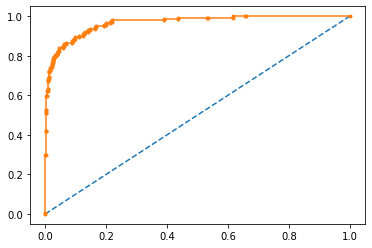

In [132]:
# AUC and ROC for the training data

# Predict Probabilities
probs = clf.predict_proba(X_test)
print(probs)
# Keep probabilities for the positive outcome only
probs = probs[:,1]
print(probs)
# Calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_test,probs)
plt.plot([0,1],[0,1], linestyle = '--')
#Plot the roc curve for the model
plt.plot(fpr,tpr, marker = '.')
plt.show()